# Import requirements

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy import stats

import lightgbm as lgb
from catboost import CatBoostRegressor

import matplotlib.pylab as plt
plt.style.use('ggplot')

In [2]:
# !pip install lightgbm
# !pip install catboost

# Define Constants

In [3]:
scaling_factor = 1000000000000

# Prepare dataset

In [28]:
data = pd.read_csv('../data/apartments_train.csv')

In [29]:
column_names_apartments = ['id', 'seller', 'area_total', 'area_kitchen', 'area_living',
       'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared',
       'bathrooms_private', 'windows_court', 'windows_street', 'balconies',
       'loggias', 'condition', 'phones', 'building_id', 'price']
column_names_buildings = ['id', 'new', 'latitude', 'longitude', 'district', 'street', 'address',
       'constructed', 'material', 'stories', 'elevator_without',
       'elevator_passenger', 'elevator_service', 'parking', 'garbage_chute',
       'heating']

In [30]:
def preprocess(data,price_outlier_rejection=False,fill=True):
    if price_outlier_rejection is True:
        data = data[(np.abs(stats.zscore(data['price'])) < 3.9)]
    if fill is True:
        return data.fillna(data.mean())
    else:
        return data.dropna()

In [31]:
features = column_names_apartments
data_selected = data[column_names_apartments]
print(data_selected.size)
data = preprocess(data_selected)
print(data.size)
X, y = data[features[:-1]], data['price']

442415
442415


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adaboost

## All data

In [33]:
adaboost = AdaBoostRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    loss='square',
    random_state=42
)

In [34]:
adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.05, loss='square', n_estimators=1500,
                  random_state=42)

In [35]:
ada_prediction = adaboost.predict(X_test)

In [36]:
ada_mse = round(mean_squared_error(ada_prediction, y_test), 2)
print('Test MSE:', ada_mse/scaling_factor)

Test MSE: 907.0485759573763


Text(0, 0.5, 'Ground Truth')

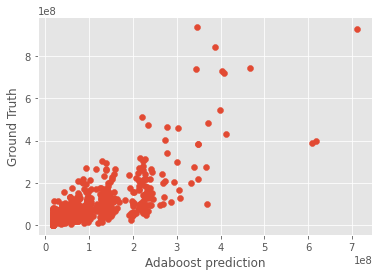

In [37]:
plt.scatter(ada_prediction, y_test)
plt.xlabel('Adaboost prediction')
plt.ylabel('Ground Truth')

## All data + outlier price rejection

In [38]:
data = pd.read_csv('../data/apartments_train.csv')
features = column_names_apartments
data_selected = data[features]
print(data_selected.size)
data = preprocess(data=data_selected,price_outlier_rejection=True)
print(data.size)
X, y = data[features[:-1]], data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

442415
439014


Test MSE: 641.5440546647995


Text(0, 0.5, 'Ground Truth')

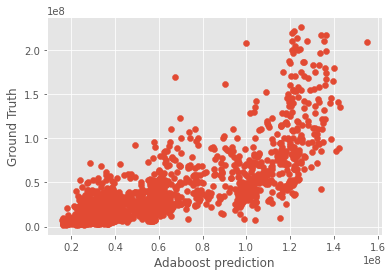

In [39]:
adaboost4 = AdaBoostRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    loss='square',
    random_state=42
)
adaboost4.fit(X_train, y_train)
ada_prediction = adaboost4.predict(X_test)
ada_mse = round(mean_squared_error(ada_prediction, y_test), 2)
print('Test MSE:', ada_mse/scaling_factor)
plt.scatter(ada_prediction, y_test)
plt.xlabel('Adaboost prediction')
plt.ylabel('Ground Truth')

## Choose features based on importance according to feature_analysis_buildings

In [48]:
data = pd.read_csv('../data/apartments_train.csv')
print(data)
features = ['area_total', 'rooms', 'ceiling','price']
data_selected = data[features]
print(data_selected)
print(data_selected.size)
data = preprocess(data_selected)
print(data.size)
X, y = data[features[:-1]], data['price']

          id  seller       price  area_total  area_kitchen  area_living  \
0          0     3.0   7139520.0        59.2          12.5         31.0   
1          1     NaN  10500000.0        88.0          14.2         48.0   
2          2     3.0   9019650.0        78.5          22.5         40.8   
3          3     NaN  10500000.0        88.0          14.0         48.0   
4          4     NaN  13900000.0        78.0          17.0         35.0   
...      ...     ...         ...         ...           ...          ...   
23280  23280     NaN  13300000.0        65.0          16.0         32.0   
23281  23281     3.0  15854300.0        56.9           9.6         36.5   
23282  23282     NaN  19800000.0        73.4          23.0         29.3   
23283  23283     0.0  29999000.0       100.8          20.0          NaN   
23284  23284     0.0  10950000.0        57.7           8.4          NaN   

       floor  rooms  layout  ceiling  bathrooms_shared  bathrooms_private  \
0        2.0    2.0   

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
adaboost2 = AdaBoostRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    loss='square',
    random_state=42
)

Test MSE: 1164.4611690417707


Text(0, 0.5, 'Ground Truth')

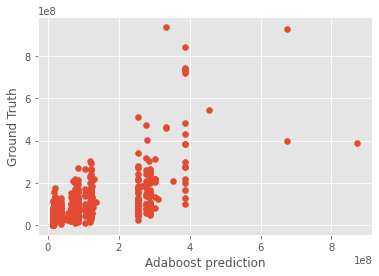

In [43]:
adaboost2.fit(X_train, y_train)
ada_prediction = adaboost2.predict(X_test)
ada_mse = round(mean_squared_error(ada_prediction, y_test), 2)
print('Test MSE:', ada_mse/scaling_factor)
plt.scatter(ada_prediction, y_test)
plt.xlabel('Adaboost prediction')
plt.ylabel('Ground Truth')

### Reject price outliers

In [44]:
data = pd.read_csv('../data/apartments_train.csv')
features = ['area_total', 'rooms', 'ceiling','area_kitchen','bathrooms_shared','bathrooms_private','price']
data_selected = data[features]
print(data_selected.size)
data = preprocess(data=data_selected, price_outlier_rejection=False,fill=True)
print(data.size)
X, y = data[features[:-1]], data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

162995
162995


Test MSE: 1101.2092172784141


Text(0, 0.5, 'Ground Truth')

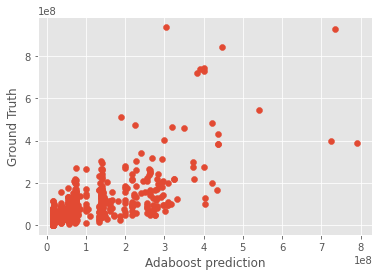

In [45]:
adaboost3 = AdaBoostRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    loss='square',
    random_state=42
)
adaboost3.fit(X_train, y_train)
ada_prediction = adaboost3.predict(X_test)
ada_mse = round(mean_squared_error(ada_prediction, y_test), 2)
print('Test MSE:', ada_mse/scaling_factor)
plt.scatter(ada_prediction, y_test)
plt.xlabel('Adaboost prediction')
plt.ylabel('Ground Truth')